## Linear Regression to understand how advertising is 
# afftecting sales.
The data consists of money spend through TV, Radio and Newspaper and the the corresponding sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
DATA_PATH = 'data/Advertising.csv'

#reading data with pandas
data = pd.read_csv(DATA_PATH)

#printing first 5 entries
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# here we don't require the first column
data.drop(['Unnamed: 0'], axis = 1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [4]:
# as we have to use simple single variable Linear Regression, we can choose 
#one independent parameter (x) (tv, radio, paper) and the dependent variable (y) as sales

# Tv vs Sales

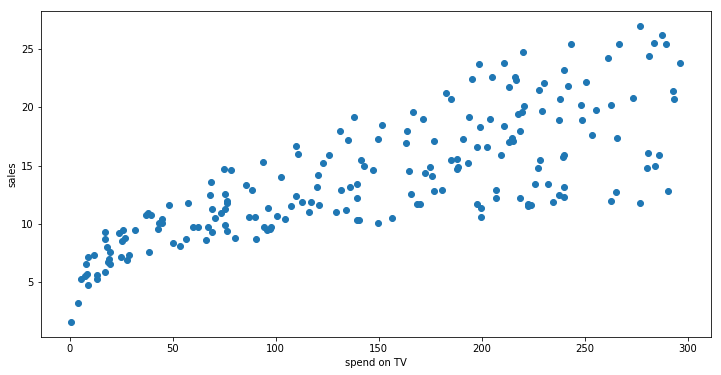

In [5]:
plt.figure(figsize = (12, 6))
plt.scatter(x = data['TV'], y = data['sales'])
plt.xlabel('spend on TV')
plt.ylabel('sales')
plt.show()


# Radio Vs Sales

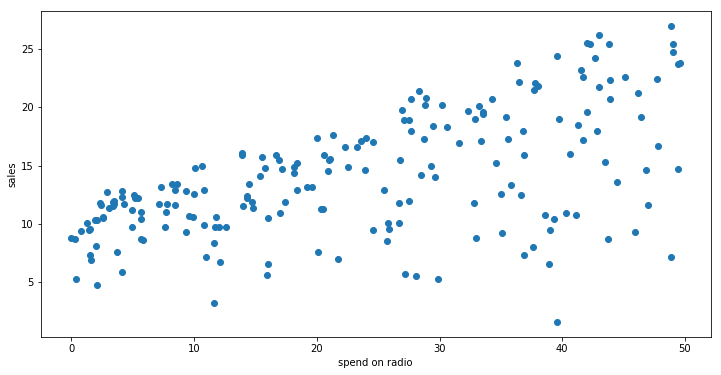

In [6]:
plt.figure(figsize = (12, 6))
plt.scatter(x = data['radio'], y = data['sales'])
plt.xlabel('spend on radio')
plt.ylabel('sales')
plt.show()

# Newspaper Vs Sales

Text(0,0.5,'sales')

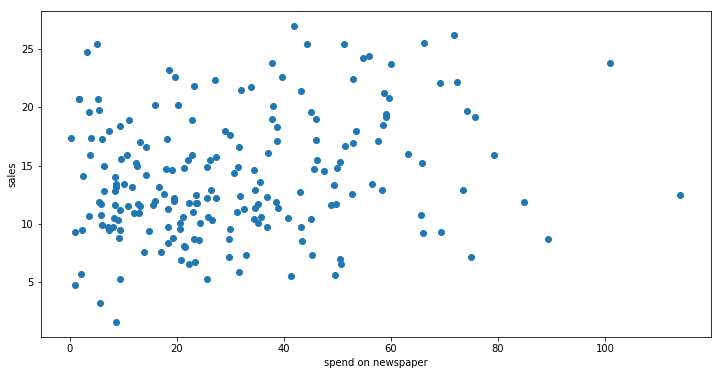

In [7]:
plt.figure(figsize = (12, 6))
plt.scatter(x = data['newspaper'], y = data['sales'])
plt.xlabel('spend on newspaper')
plt.ylabel('sales')

In [8]:
# we can see the TV and sales are quite linearly related to each other.
# So, we will perform single variable Linear Regression with Tv and Sales
X = data['TV'].values
Y = data['sales'].values
print(X.shape, Y.shape)

((200,), (200,))


In [9]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [10]:
# making regression object / estimator
lReg = LinearRegression()

# training regression 
lReg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# we can get the regression coefficients and y-intercept by accessing the attributes
intercept = lReg.intercept_[0]
coeff = lReg.coef_[0][0] # [0][0] as it comes out in array

In [12]:
print('Linear model is: sales = {:.5} TV + {:.5}'.format(coeff, intercept) )

Linear model is: sales = 0.047537 TV + 7.0326


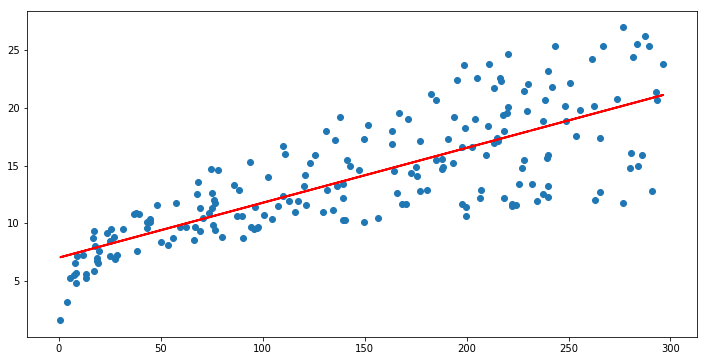

In [13]:
# Let's plot our model's prediction
predictions = lReg.predict(X)
#print(predictions)

plt.figure(figsize = (12, 6))

plt.plot(X, predictions, c = 'r', linewidth = 2)
plt.scatter(x = X, y = Y)
plt.show()

# R-squared score 
R-squared error represents how much of total variation in Y is explained by the model. It ranges from 0 to 1, 0 being worst and 1 being best ideally

In [14]:
score = r2_score(Y, predictions)
score

0.611875050850071

In [15]:
# we are getting a score of 0.6118 for relation between Tv and sales,
# which is good

# Multiple Regression 
Now we shall include all the independent variables - Tv, Radio, Newspaper together and 
perform regression with multiple variables

In [16]:
XM = data.drop(['sales', 'Unnamed: 0'], axis = 1)
XM.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
lRegM = LinearRegression()
lRegM.fit(XM, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# here we will have four coefficients instead of 2
print('Linear Model: sales = {:.5} Tv + {:.5} Radio + {:.5} Newspaper + {:.5}'
      .format(lRegM.coef_[0][0], lRegM.coef_[0][1], lRegM.coef_[0][2], lRegM.intercept_[0]))

Linear Model: sales = 0.045765 Tv + 0.18853 Radio + -0.0010375 Newspaper + 2.9389


In [ ]:
# Let's plot the mult

# R- squared score

In [47]:
predictionsM = lRegM.predict(XM)
scoreM = r2_score(y_true = Y, y_pred = predictionsM)
scoreM

0.8972106381789522

In [48]:
# here considering multiple independent valraibles, increased the r2_score for our model

# P-Values for predictors (features)
P-values help us decide whether a feature which we used (TV, radio, newspaper) was 
significant to be considered or not. We assume null hypothesis to be the coefficient 
of that feature is zero, if p-value < 0.05, we can reject null hypothesis and say it is significant

In [53]:
# we will use statsmodel package for this. 


X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 21 Jun 2019   Prob (F-statistic):           1.58e-96
Time:                        00:48:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Here we see that the p-value for Newspaper is > 0.5, hence we can reject using newspaper in our rgression model as it is not causing significant effect